# term1_sprint3 機械学習スクラッチ　線形回帰

## 2.線形回帰スクラッチ

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。  
以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。  

## 雛形

In [1]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
        
    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pass
        return

## 解答用のクラス

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, no_bias=False, verbose=True):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose      
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=False, y_val=False):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        self.X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        self.y = y.reshape(-1,1)
        self.theta = np.random.rand(1, self.X.shape[1])
        
        # 最急降下法を繰り返し、良いパラメーターを探索        
        for i in range(self.iter):      
            self.y_hat = self._linear_hypothesis(self.X, self.theta)
            self._gradient_descent(self.X, self.y, self.y_hat)
            self.loss[i] += np.mean((self.y_hat - self.y)**2)/2

#             print("y\n",y)
#             print("yhat\n",self.y_hat[:10])
#             print("theta_new\n",theta_new)
            
            # Xの検証データを元に予測した値の学習過程を習得
            if (type(X_val) != bool):
                self.val =1
                X2 = np.concatenate([np.ones((X_val.shape[0],1)), X_val], axis=1)
                y_hat2 = self._linear_hypothesis(X2, self.theta)
                self.val_loss[i] += np.mean((y_hat2 - y_val)**2)/2  
            
            # verboseをTrueにした際は学習過程を出力
            if self.verbose :
                print(f"--{i+1}回目~loss~-------\n{self.loss[i]}")
                print(f"--{i+1}回目~loss_val~---\n{self.val_loss[i]}")

# 1.4.1（解答）------------------------------------

    def _linear_hypothesis(self, X, theta):
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        # 予測値を求める                  
        return np.dot(X, theta.T)    
          
# 2.2.1（解答）-----------------------------------

    def _gradient_descent(self, X, y, y_hat):
        """
        最急降下法で計算する
 
        """
        gd = np.dot((y_hat - y).T, X)
        self.theta -= self.lr * gd
    
# 3.1.1（解答）---------------------------------------

    def predict(self, X):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        X = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        return np.dot(X, self.theta.T)
    
# 7.1.1（解答）---------------------------------------    
    def plot_cost(self):
        """
        損失の推移をグラフ化する。    
        検証用データが入力されていれば、学習用と検証用の損失推移を重ねてグラフ化
        """
        plt.title("Num_of_Iteration vs Loss")
        plt.xlabel("Num_of_Iteration")
        plt.ylabel("Loss")
        a = range(self.iter)
        plt.plot(range(len(self.loss)), self.loss, color="b", label="train_loss")
        if self.val ==1:
            plt.plot(range(len(self.val_loss)), self.val_loss, color="orange", label="val_loss")
        plt.grid()
        plt.legend()

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)$$



x
 : 特徴量ベクトル


θ
 : パラメータベクトル


n
 : 特徴量の数


x
j
 : j番目の特徴量


θ
j
 : j番目のパラメータ（重み）


特徴量の数
n
は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$h_\theta(x) = \theta^T \cdot x.$$
雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

In [4]:
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]$$
α
 : 学習率


i
 : サンプルのインデックス


j
 : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。
雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

In [5]:
def _gradient_descent(self, X, error):
    """
    説明を記述
    """
    pass

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数$hθ(x)$の出力が推定結果です。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。
$$L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$$

m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

雛形

In [6]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    pass
    return mse

### 4.1.1（解答）

In [92]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    L = np.mean((y_pred - y)**2)
    return L

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数）$J(θ)$は次の式です。
$$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.$$

m
  : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値



# 3.検証

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

### 6.1.1（準備）

In [8]:
data_master = pd.read_csv("sample_dataset/house-prices-advanced-regression-techniques/train.csv")
df_master = pd.DataFrame(data_master)
X = np.array(df_master[['YearBuilt']])
y = np.array(df_master[["SalePrice"]])
print("X:", X.shape, "y:", y.shape)

X: (1460, 1) y: (1460, 1)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y.ravel(),test_size=0.20, random_state=0)
print(f"Xの訓練値:{x_train.shape}  Yの訓練値:{y_train.shape}  Xの正解値:{x_test.shape}  Yの正解値:{y_test.shape}")

Xの訓練値:(1168, 1)  Yの訓練値:(1168,)  Xの正解値:(292, 1)  Yの正解値:(292,)


In [63]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

### 6.2.1　sklearnの線形回帰

In [64]:
# sklearn線形回帰
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
lr_pred = lr.predict(x_test)

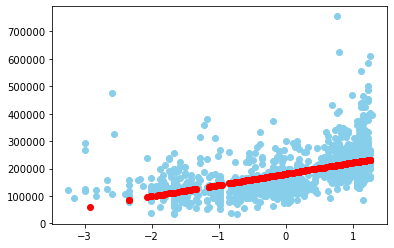

In [98]:
plt.scatter(x_train_std, y_train, c="skyblue")
plt.scatter(x_test_std, lr_pred, c="red")

### 6.3.1（解答）スクラッチ線形回帰の学習

In [159]:
slr = ScratchLinearRegression(num_iter=200, lr=0.00001, verbose=False)
slr.fit(x_train_std, y_train, x_test_std, y_test)
slr_pred_std= slr.predict(x_test_std)


### 6.3.2（解答）スクラッチ線形回帰の予測値を描写

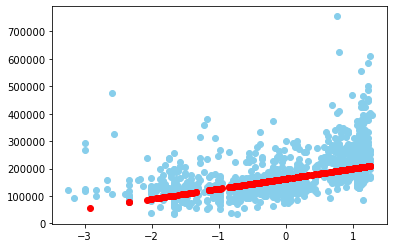

In [160]:
plt.scatter(x_train_std, y_train, c="skyblue")
plt.scatter(x_test_std, slr_pred_std, c="red")

In [161]:
print(f"MSE:{MSE(slr_pred_std, y_test)}  sklearn_MSE:{MSE(lr_pred, y_test)}")

MSE:8420509552.717089  sklearn_MSE:4980069536.617274


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。


プロット例
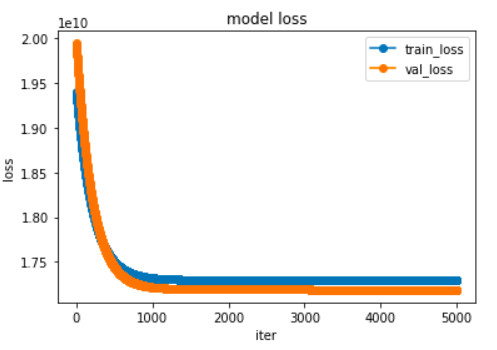

### 7.1.1（解答）

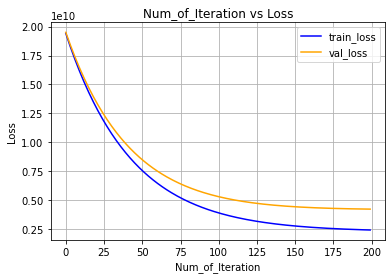

In [162]:
slr.plot_cost()